# <center>CSIS 452 - Applied Machine Learning</center>
## Assignment 2 - due: 2/27/2020
In this assignment you will use `pandas`, `numpy`, and `matplotlib` to experiment with a data set of cars. The data set has a number of attributes about the cars such as <b>Number of cylinders</b> and <b>Horse Power</b> along with the corresponding gas consumptions in <b>Miles per Gallon</b>. The intent is to use all the other attributes of a car to predict its gas mileage.  

We will first explore the data set using `pandas`. We will then extract the attributes (i.e., independent variables) and the gas mileage (i.e., dependent variable) as `numpy` arrays. We will use `numpy` to replace any missing data. We will then implement the linear regression normal equation using `numpy` and apply it to the mpg data set. 

Be sure to run the cells in order.

Enter your name as a comment in the cell below:

In [1]:
# Developer: Brady Lange
# Date: 02/26/2020
# Course: Applied Machine Learning (CSIS 452)
# Description: Data exploration and basic analysis of a cars data set. 
#              Analysis includes the basic statistical calculations 
#              and the normal equation for linear regression.

In [2]:
# Load required libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np

In the following cell, provide statement that would load the file <b>mpg.csv</b> into a `pandas` data frame called <b>`mpg_df`</b> and then display the first 3 rows of the data frame.

In [3]:
# Load and Explore Data
# =============================================================================
# Load cars data set
mpg_df = pd.read_csv("./data/mpg.csv")

# Display first three rows of the cars data set
mpg_df.head(n = 3)

cylinders  displacement  horsepower  weight  acceleration   MPG
0          8         307.0       130.0    3504          12.0  18.0
1          8         350.0       165.0    3693          11.5  15.0
2          8         318.0       150.0    3436          11.0  18.0

## Expected Output:

<img src="images/mpg_03_rows.png" width="50%" height="50%">

Use the `pandas` `info()` function to generate basic information about the mpg data you just loaded.

In [4]:
# Display information about the car data set
print("Data Set Information:")
print("**********************************************************************")
mpg_df.info()

Data Set Information:
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    394 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
 5   MPG           398 non-null    float64
dtypes: float64(4), int64(2)
memory usage: 18.8 KB


## Expected Output:

<img src="images/mpg_info.png" width="35%" height="35%">

Review the information produced. In the following cell indicate if any of the attributes have missing data. If so, how many values are missing for the corresponding attribute. Be sure to explain how you discovered that.

Note that horsepower has 394 values while all other attributes have 398 values. This indicates that horsepower is missing 4 values.

Use pandas `describe()` function to further explore each of the attributes.

In [5]:
# Check for NA values and add them together for each feature
print("NA Values by Feature:")
print("**********************************************************************")
print(mpg_df.isna().sum(), "\n")

# Retrieve and display statistics for the car data set
print("Feature Statistics:")
print("**********************************************************************")
print(mpg_df.describe())

NA Values by Feature:
**********************************************************************
cylinders       0
displacement    0
horsepower      4
weight          0
acceleration    0
MPG             0
dtype: int64 

Feature Statistics:
**********************************************************************
        cylinders  displacement  horsepower       weight  acceleration  \
count  398.000000    398.000000  394.000000   398.000000    398.000000   
mean     5.454774    193.425879  104.144670  2970.424623     15.568090   
std      1.701004    104.269838   38.486928   846.841774      2.757689   
min      3.000000     68.000000   46.000000  1613.000000      8.000000   
25%      4.000000    104.250000   75.000000  2223.750000     13.825000   
50%      4.000000    148.500000   92.000000  2803.500000     15.500000   
75%      8.000000    262.000000  125.000000  3608.000000     17.175000   
max      8.000000    455.000000  230.000000  5140.000000     24.800000   

              MPG  
count 

The `is.na()` method checks each feature's values and returns a `DataFrame()` of `True` and `False` values. `True`, when the value is NA and `False` when the value is not NA. Next, I can add these `True` values up with the `sum()` method which gives me only 4 NA values that appear in the feature `horsepower`.

## Expected Output:

<img src="images/mpg_describe.png" width="50%" height="50%">

Now let's plot the data frame using the `DataFrame()` `plot()` function.

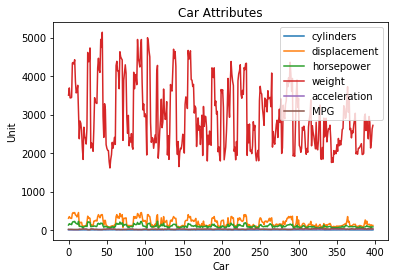

In [6]:
# Visualize Data
# =============================================================================
# Visually plot the cars data set
ax = mpg_df.plot(title = "Car Attributes")
ax.set_xlabel("Car")
ax.set_ylabel("Unit")
plt.show()

## Expected Output:

<img src="images/mpg_all_plot.png" width="40%" height="40%">

Remove the feature <b>`weight`</b> from the `DataFrame()` and save the resulting `DataFrame()` as `mpg_no_weight_df`.

In [7]:
# Remove the `weight` feature from cars data set
mpg_no_weight_df = mpg_df.drop("weight", axis = 1)

# Display the new data frame's information without `weight`
print("Data Set Information (Without Weight Feature:)")
print("**********************************************************************")
print(mpg_no_weight_df.info())

Data Set Information (Without Weight Feature:)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    394 non-null    float64
 3   acceleration  398 non-null    float64
 4   MPG           398 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 15.7 KB
None


## Expected Output:

<img src="images/mpg_info_no_weight.png" width="35%" height="35%">

Now let's plot the resulting `DataFrame()` using the `DataFrame()` `plot()` function.

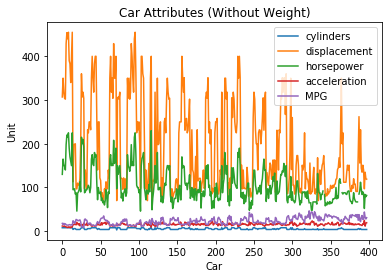

In [8]:
# Visually plot the new cars data set without `weight`
ax = mpg_no_weight_df.plot(title = "Car Attributes (Without Weight)")
ax.set_xlabel("Car")
ax.set_ylabel("Unit")
plt.show()

## Expected Output:

<img src="images/mpg_plot_no_weight.png" width="40%" height="40%">

Now let's use `matplotlib` to produce scatter plots of `MPG` vs. each attribute separately on its own figure. Be sure that each plot has the correct title.

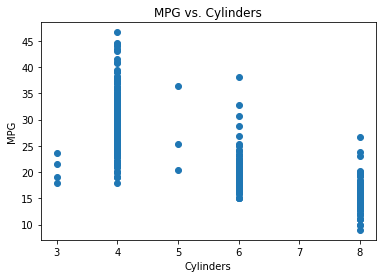

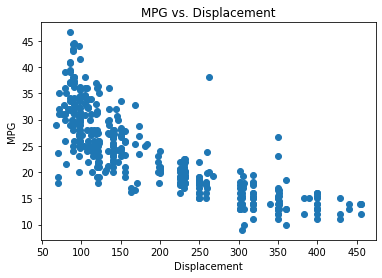

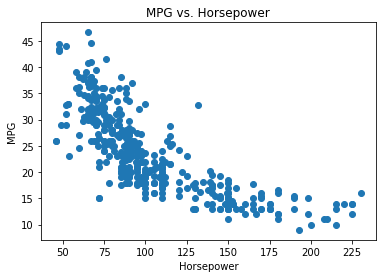

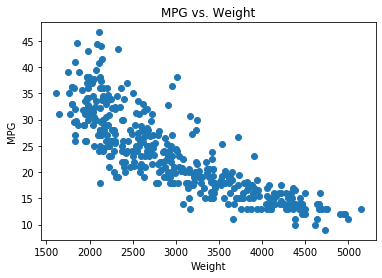

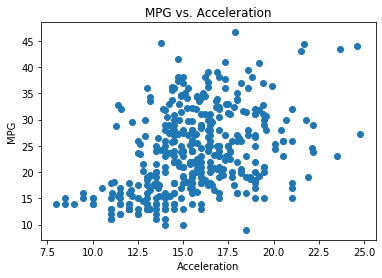

[None, None, None, None, None]

In [9]:
def display_scatter_x_y(x, y, data):
    '''
    Takes an input value of x and y with their corresponding
    data and scatter plots the specific feature (x) against the 
    specific criterion (y) on its own figure with appropriate 
    metadata labels. Finally, displays the scatter plot.
    
    @param x  feature values
    @param y  criterion values
    @param data  data set of x and y

    @version  1.0.0, 02/13/2020
    @since  1.0, 02/13/2020
    '''
    # Visually scatter plot x = feature(n), y = criterion(MPG)
    # Instantiate figure
    fig = plt.figure()
    # Add subplot with default location
    ax = fig.add_subplot(1, 1, 1)
    # Instantiate scatter plot
    ax.scatter(x, y, data = data)
    # Set figure's title
    ax.set_title(y + " vs. " + x.capitalize())
    # Set figure's x label
    ax.set_xlabel(x.capitalize())
    # Set figure's y label
    ax.set_ylabel(y)
    # Display the figure
    plt.show()   

# Comprehension to scatter plot each feature against the criterion
[display_scatter_x_y(mpg_df.columns[i], "MPG", mpg_df) for i in range(mpg_df.shape[1] - 1)]

## Expected Output:

<img src="images/mpg_all_figures.png" width="50%" height="50%">

Using `pandas` <b>`corr()`</b> function produce the full correlation matrix.

In [10]:
# Correlation function of all of the features in car data set
print("Data Set Correlation Matrix:")
print("**********************************************************************")
print(mpg_df.corr())

Data Set Correlation Matrix:
**********************************************************************
              cylinders  displacement  horsepower    weight  acceleration  \
cylinders      1.000000      0.950721    0.845788  0.896017     -0.505419   
displacement   0.950721      1.000000    0.900071  0.932824     -0.543684   
horsepower     0.845788      0.900071    1.000000  0.865179     -0.688710   
weight         0.896017      0.932824    0.865179  1.000000     -0.417457   
acceleration  -0.505419     -0.543684   -0.688710 -0.417457      1.000000   
MPG           -0.775396     -0.804203   -0.778358 -0.831741      0.420289   

                   MPG  
cylinders    -0.775396  
displacement -0.804203  
horsepower   -0.778358  
weight       -0.831741  
acceleration  0.420289  
MPG           1.000000  


## Expected Output:

<img src="images/mpg_corr.png" width="70%" height="70%">

Using `pandas` <b>`scatter_matrix()`</b> function, produce the histogram of all the attributes.

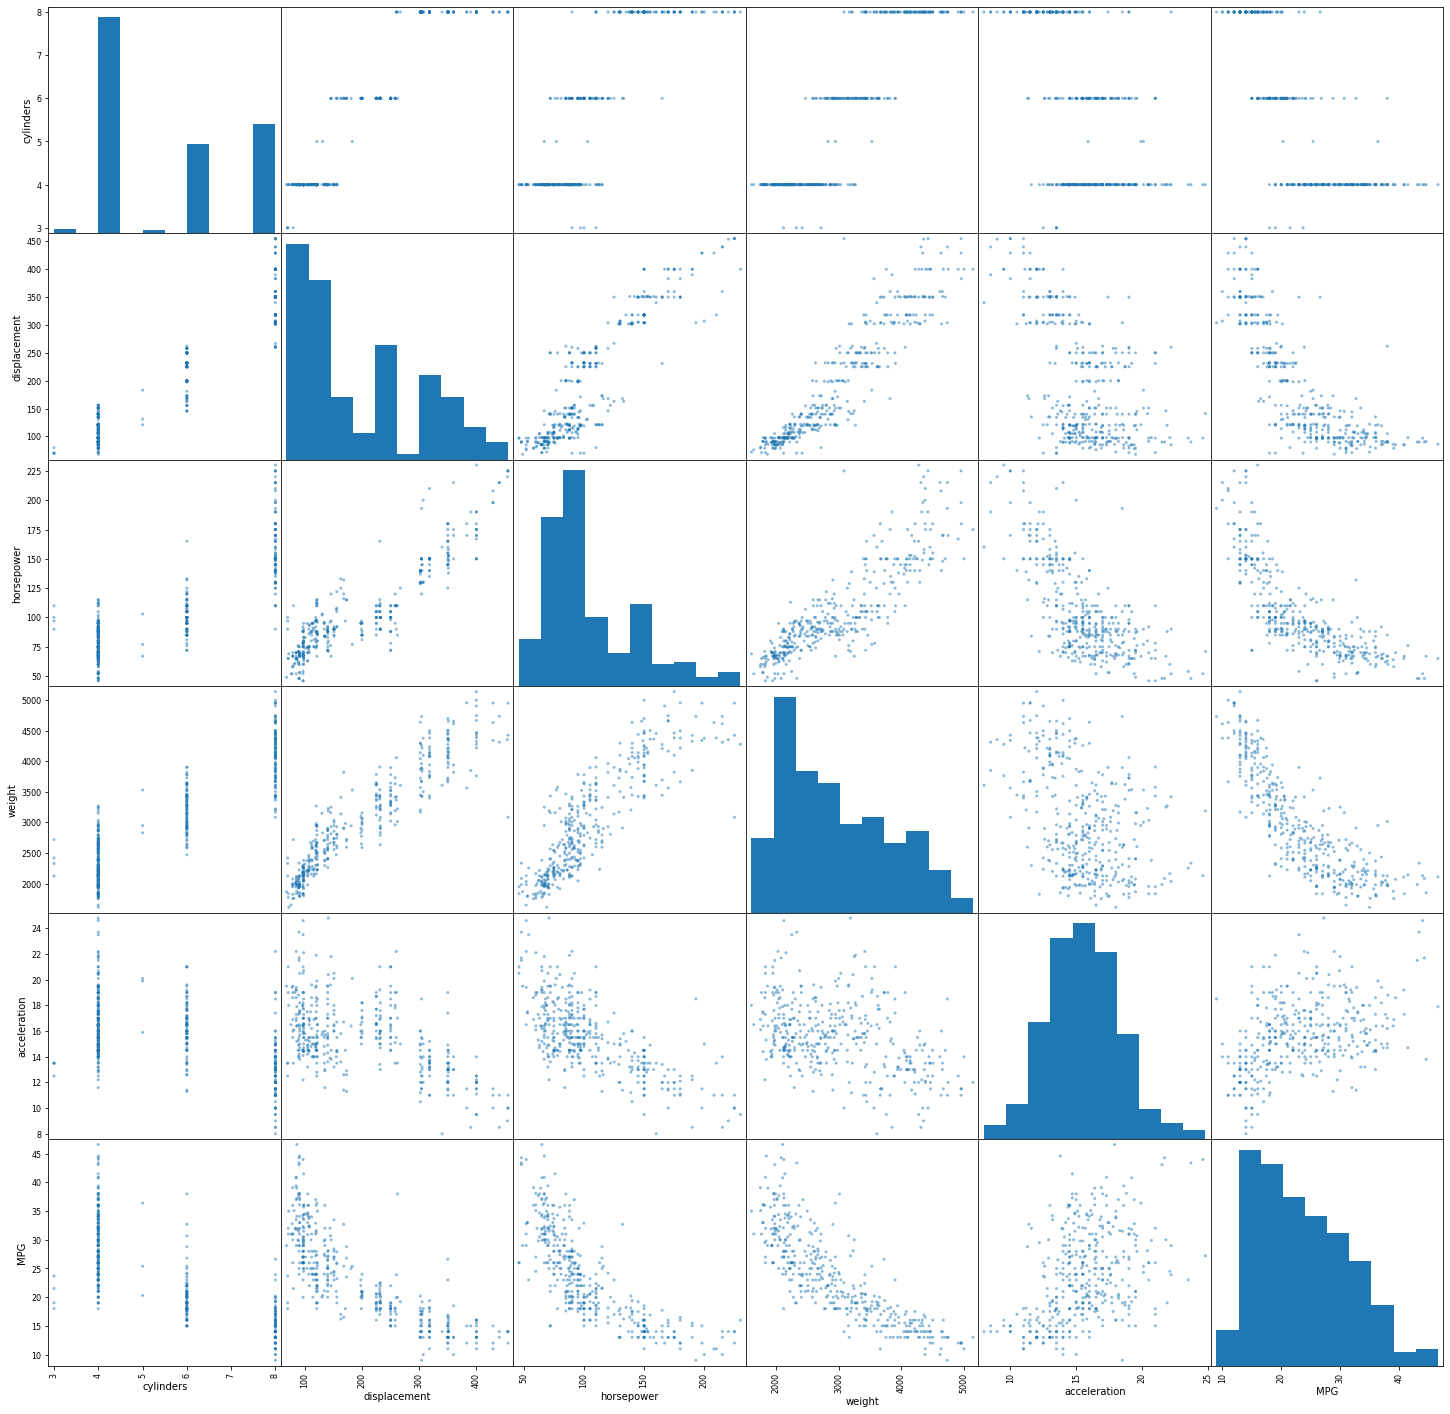

In [11]:
# Visually plot a scatter matrix of the cars data set
scatter_matrix(mpg_df, figsize = (25, 25))
# Display the scatter matrix plot
plt.show()

## Expected Output:

<img src="images/mpg_scatter_matrix.png" width="100%" height="100%">

1.) Compare your results of the last three steps. Can you identify the cells in the `scatter_matrix()` that match your own scatter plots?   

2.) Does the correlation coefficient between `MPG` and `weight` match the corresponding scatter plot. Explain your answers in the following cell.

1.) I can identify the cells in the `scatter_matrix()` plot that match my own scatter plots as they appear in the bottom row going from the feature `cylinders` to the feature `acceleration`. The criterion, `MPG`, is being plotted against each feature in the cars data set.

2.) `MPG` and `weight` appear to have a negative correlation on the scatter matrix. When looking at the `corr()` method  between the features `MPG` and `weight` it has the negative value of `-0.831741` therefore validates this scatter matrix plot.

Extract the independent variables from the data frame and save it as `X_df`.  Extract the dependent variable (`MPG`) and save it in its own data frame `y_df`.

In [12]:
# Preprocess Data
# =============================================================================
# Remove the criterion value `MPG`
X_df = mpg_df.drop("MPG", axis = 1)

# Retrieve only the criterion value `MPG`
y_df = mpg_df[["MPG"]]

# Display the information of the features and criterion
print("Data Set Features Information:")
print("**********************************************************************")
print(X_df.info(), "\n")
print("Data Set Criterion Information:")
print("**********************************************************************")
print(y_df.info(), "\n")

Data Set Features Information:
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cylinders     398 non-null    int64  
 1   displacement  398 non-null    float64
 2   horsepower    394 non-null    float64
 3   weight        398 non-null    int64  
 4   acceleration  398 non-null    float64
dtypes: float64(3), int64(2)
memory usage: 15.7 KB
None 

Data Set Criterion Information:
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   MPG     398 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB
None 



## Expected Output:

<img src="images/mpg_info_x_y.png" width="35%" height="35%">

Now convert `X_df` and `y_df` to `numpy` arrays and save them as `X` and `y` respectively.

In [13]:
# Convert features and criterion to numpy arrays
X = np.array(X_df)
y = np.array(y_df)

# Display the shapes on the features and criterion
print("Data Set Features Dimension:")
print("**********************************************************************")
print(X.shape)
print("Data Set Criterion Dimension:")
print("**********************************************************************")
print(y.shape)

Data Set Features Dimension:
**********************************************************************
(398, 5)
Data Set Criterion Dimension:
**********************************************************************
(398, 1)


## Expected Output:

(398, 5)

(398, 1)

Replace all missing values in `X` with 0 and display the the last 15 values of the attribute with missing values. You should be able to tell the attribute with missing values by looking at the `DataFrame()` `info()` you generated earlier.

<b>HINT:</b> Missing values are stored as <b>`NaN`</b>. You can use <b>`np.isnan()`</b> to identify them.

In [14]:
# Replace `NaN` values with 0
X = np.nan_to_num(X)

# Display the last 15 rows of the feature `horsepower`
print("Data Set Feature `horsepower` - Last 15 Records:")
print("**********************************************************************")
print(X[-15:, 2])

Data Set Feature `horsepower` - Last 15 Records:
**********************************************************************
[ 67.  67.  67.   0.  85.  92. 112.  96.  84.  90.  86.  52.  84.  79.
  82.]


## Expected Output:

[  67.   67.   67.    0.   85.   92.  112.   96.   84.   90.   86.   52. 84.   79.   82.]


The Normal Equation for Linear Regression is:

<b>W = (X$^T$ · X)$^{−1}$ · X$^T$ · y</b>

Use this equation to compute the parameter vector `W`.

In [15]:
# Normal Equation for Linear Regression
# =============================================================================
# Horizontally add a column of ones to X
X = np.hstack([np.ones((X.shape[0], 1)), X])
# Transpose the features
X_T = np.transpose(X)
# Calculate the inverse of the dot product of transpose X and X
W = np.linalg.inv(X_T.dot(X))
# Calculate the dot product of W and transpose X
W = W.dot(X_T)
# Calculate the dot product of W and criterion
W = W.dot(y)
# Display the normal equation for linear regression
print("Normal Equation for Linear Regression Parameter Vector:")
print("**********************************************************************")
print(W)

Normal Equation for Linear Regression Parameter Vector:
**********************************************************************
[[ 4.59141734e+01]
 [-3.92538232e-01]
 [-1.34309203e-03]
 [-3.92127848e-02]
 [-5.30526428e-03]
 [-1.26513615e-02]]


## Expected Output:

[[ 4.59141734e+01]
 [-3.92538232e-01]
 [-1.34309203e-03]
 [-3.92127848e-02]
 [-5.30526428e-03]
 [-1.26513615e-02]
